# Measures of Frequency

Frequency Distributions are used for quantitative and qualitative data. They count the outcomes in a data set or sample. The frequency distribution is usualy presented in a table or a graph. 

Frequency distribution is basically a presentation or summary of grouped data that’s been categorized based on mutually exclusive classes and the number of occurrences in each respective class. 

It allows for a more structured and organized way to present raw data.

Common charts and graphs used in frequency distribution presentation and visualization include bar charts, histograms, pie charts, and line charts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

**student-mat.csv** dataset is related to student performance in math in two high schools in Portugal.

In [2]:
data = pd.read_csv('student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The database has 33 variables. We are going to work with a subset of them:
- **school**: student's school (***`binary`***: 'GP' or 'MS')
- **sex**: student's sex (***`binary`***: 'F' - female or 'M' - male)
- **age**: student's age (***`numeric`***: from 15 to 22)
- **Pstatus**: parent's cohabitation status (***`binary`***: 'T' - living together or 'A' - apart)
- **studytime**: weekly study time (***`numeric`***: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **schoolsup**: extra educational support (***`binary`***: yes or no)
- **internet**: Internet access at home (***`binary`***: yes or no)
- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

In [3]:
data = data[['school','sex','age','Pstatus','studytime','schoolsup','internet','G1','G2','G3']]
print(data.shape)
data.head()

(395, 10)


,school,sex,age,Pstatus,studytime,schoolsup,internet,G1,G2,G3
0,GP,F,18,A,2,yes,no,5,6,6
1,GP,F,17,T,2,no,yes,5,5,6
2,GP,F,15,T,2,yes,yes,7,8,10
3,GP,F,15,T,3,no,yes,15,14,15
4,GP,F,16,T,2,no,no,6,10,10


We have 5 **`binary`** variables. We want to know the number of cases in each category.

Let's start with 'school'

In [4]:
data.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

There are many different graphs to plot information.

Plotting the same information

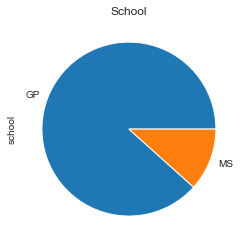

In [5]:
data.school.value_counts().plot(kind='pie', title='School');

Bar charts are easy for our eyes to read. Because of how our eyes compare the relative end points of the bars, it is important that bar charts always have a zero baseline (where the x‐axis crosses the y‐axis at zero), otherwise you get a false visual comparison.

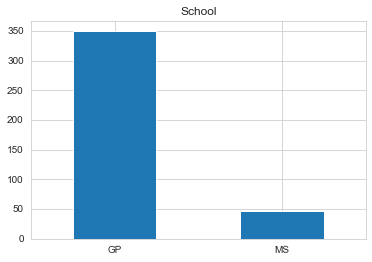

In [6]:
data.school.value_counts().plot(kind='bar', title='School', rot=True);

Let's do the same with the other 4 **`binary`** variables.

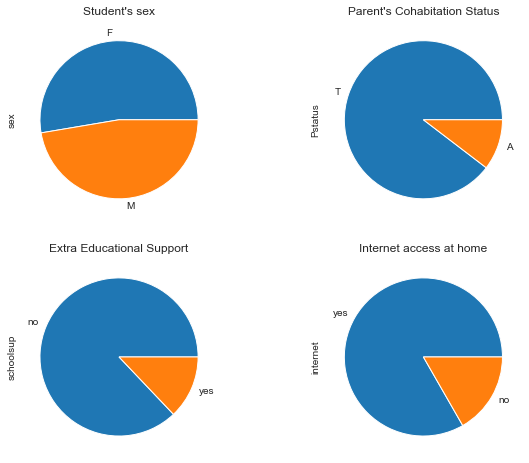

In [7]:
# Pie charts
plt.figure(figsize=(10,8))

plt.subplot(221)
data.sex.value_counts().plot(kind='pie', title="Student's sex");

plt.subplot(222)
data.Pstatus.value_counts().plot(kind='pie', title="Parent's Cohabitation Status");

plt.subplot(223)
data.schoolsup.value_counts().plot(kind='pie', title='Extra Educational Support');

plt.subplot(224)
data.internet.value_counts().plot(kind='pie', title='Internet access at home');

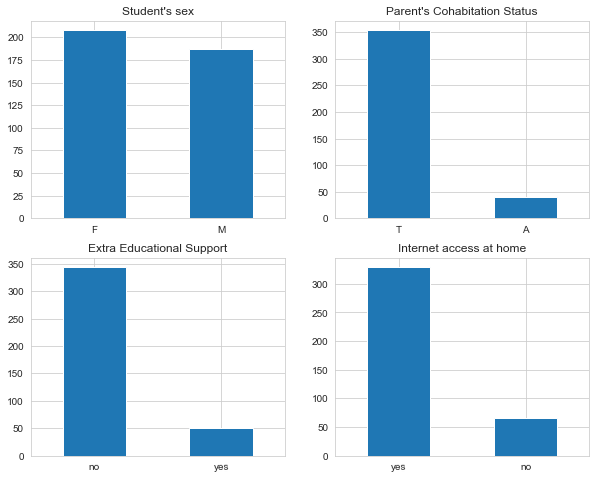

In [8]:
# Bar charts
plt.figure(figsize=(10,8))

plt.subplot(221)
data.sex.value_counts().plot(kind='bar', rot=True, title="Student's sex");

plt.subplot(222)
data.Pstatus.value_counts().plot(kind='bar', rot=True, title="Parent's Cohabitation Status");

plt.subplot(223)
data.schoolsup.value_counts().plot(kind='bar', rot=True, title='Extra Educational Support');

plt.subplot(224)
data.internet.value_counts().plot(kind='bar', rot=True, title='Internet access at home');

**Crosstabs**

Let's plot two categorical variables.

In [9]:
pd.crosstab(data.school, data.internet, margins=True)

internet,no,yes,All
school,,,
GP,52,297,349
MS,14,32,46
All,66,329,395


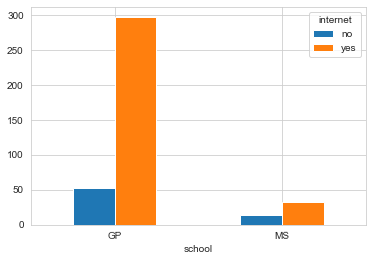

In [10]:
# Vertical bars
pd.crosstab(data.school, data.internet).plot(kind='bar', rot=True);

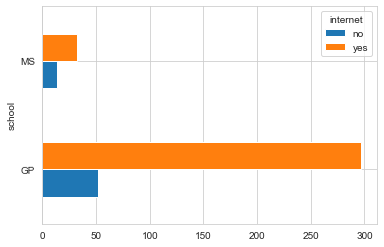

In [11]:
# Horizontal bars
pd.crosstab(data.school, data.internet).plot(kind='barh', rot=True);

In [12]:
# Normalizing values
pd.crosstab(data.school, data.internet, margins=True, normalize=True)

internet,no,yes,All
school,,,
GP,0.131646,0.751899,0.883544
MS,0.035443,0.081013,0.116456
All,0.167089,0.832911,1.000000


**Heatmap** or *heat* *map* is a representation of data in the form of a matrix in which data values are represented as colors.

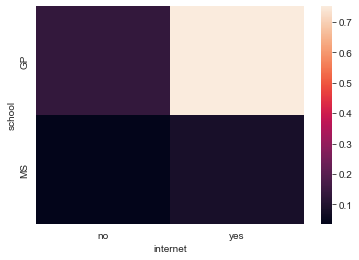

In [13]:
# Using heatmaps
sns.heatmap(pd.crosstab(data.school, data.internet, normalize=True));

Let;s change the colors:

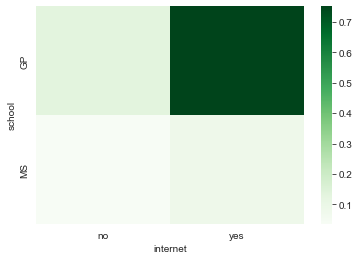

In [14]:
sns.heatmap(pd.crosstab(data.school, data.internet, normalize=True), cmap='Greens');

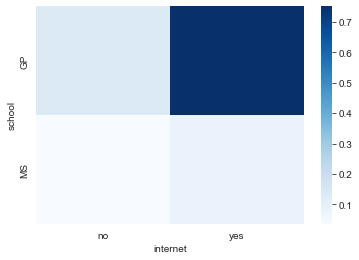

In [15]:
sns.heatmap(pd.crosstab(data.school, data.internet, normalize=True), cmap='Blues');

Adding data values:

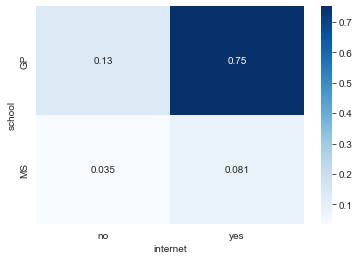

In [16]:
sns.heatmap(pd.crosstab(data.school, data.internet, normalize=True), cmap='Blues', annot=True);

We have some **`numeric`** variables. We can analyze them using histograms.

Let's start with student's age variable:

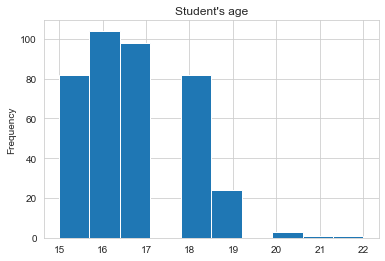

In [17]:
data.age.plot(kind='hist', title="Student's age");

Students's age are between 15 and 22. We can use bins parameter to modify the histogram:

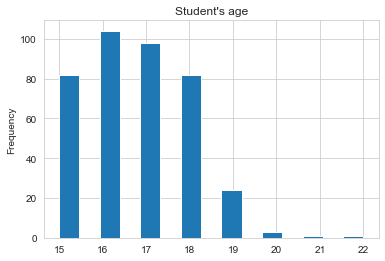

In [18]:
data.age.plot(kind='hist', bins=15, title="Student's age");

As you can see, there are only a few students with 20, 21, and 22 years old.

In [19]:
# Ficticious grades 
fgrades = np.random.normal(80,5,size=500)

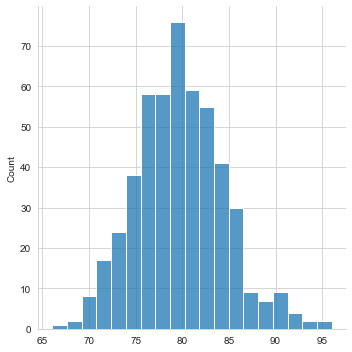

In [20]:
sns.displot(x=fgrades);

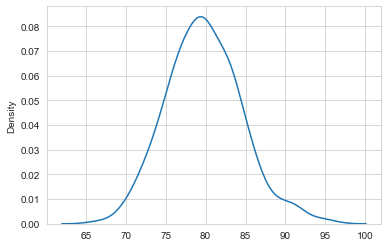

In [21]:
sns.kdeplot(x=fgrades);

The variable studytime has 4 different values. It is an **ordinal** variable.

**studytime**: weekly study time (**`numeric`**: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

Lert's graph it using a bar plot.

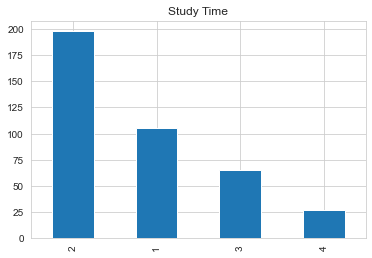

In [22]:
data.studytime.value_counts().plot(kind='bar', title="Study Time");

Rotating the x-labels

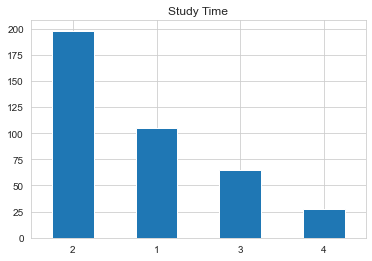

In [23]:
data.studytime.value_counts().plot(kind='bar', rot=True, title="Study Time");

By default, value_counts sort labels by frequency order. If we want to show the natural order of values, we have to include sort=False.

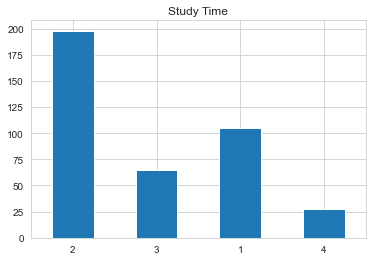

In [24]:
data.studytime.value_counts(sort=False).plot(kind='bar', rot=True, title="Study Time");

Let's analyze the rest of the **`numeric`** variables using histograms.

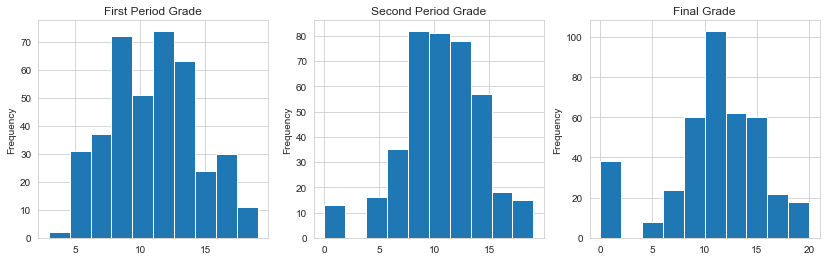

In [25]:
plt.figure(figsize=(14,4))

plt.subplot(131)
data.G1.plot(kind='hist', title="First Period Grade");

plt.subplot(132)
data.G2.plot(kind='hist', title='Second Period Grade');

plt.subplot(133)
data.G3.plot(kind='hist', title='Final Grade');

We can get a density plots:

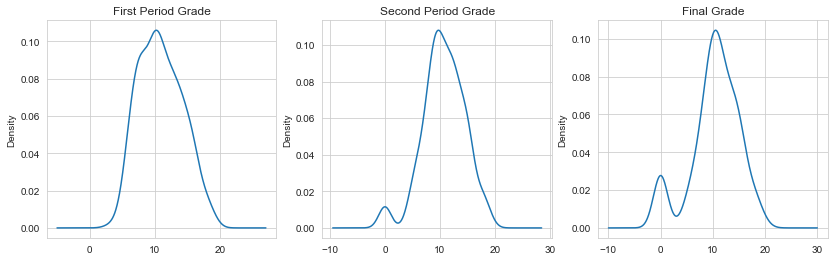

In [26]:
plt.figure(figsize=(14,4))

plt.subplot(131)
data.G1.plot(kind='kde', title="First Period Grade");

plt.subplot(132)
data.G2.plot(kind='kde', title='Second Period Grade');

plt.subplot(133)
data.G3.plot(kind='kde', title='Final Grade');